TESLA stock price prediction

!!!!!!!!Recurrent Neural Networks

In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!!!!!!!!Import the dataset

In [3]:
#importing the dataset

# load the file contents 
dataset_train = pd.read_csv('TESLA_Stock_Price_Train.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
# Create a subtable of relevant entries (open values)
# The .values makes this vector a numpy array
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
training_set

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [226.919998],
       [227.089996],
       [232.899994]])

!!!!!!!!Feature Scaling

In [7]:
# Feature Scaling

# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [8]:
# create a scaler instance to rescale all data to the range of 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))

In [9]:
# create the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled

array([[0.00771826],
       [0.02604237],
       [0.02391041],
       ...,
       [0.56883011],
       [0.56928888],
       [0.58496827]])

!!!!!!!!Splitting the training set to dependent and independent variables

In [11]:
# Creating a data structure with 120 timesteps and 1 output

# the 120 stock prices in the last 6 months before today
X_train = [] 

In [12]:
training_set_scaled.shape

(2287, 1)

In [13]:
# the stock price today
y_train = [] 

In [14]:
# we start from day 120 because that is the first instance allowing us to 
# go back 120 days 
# PATAISYTI
for i in range(120, 2287): 
    # 0 is the column ID, the only column in this case.    
    # put the last 120 days values in one row of X_train
    X_train.append(training_set_scaled[i-120:i, 0]) 
    y_train.append(training_set_scaled[i, 0])


In [15]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train

array([[0.00771826, 0.02604237, 0.02391041, ..., 0.03818648, 0.0338146 ,
        0.03740386],
       [0.02604237, 0.02391041, 0.01851302, ..., 0.0338146 , 0.03740386,
        0.04102011],
       [0.02391041, 0.01851302, 0.01041695, ..., 0.03740386, 0.04102011,
        0.04182971],
       ...,
       [0.8010795 , 0.79975709, 0.81891781, ..., 0.6492241 , 0.65586294,
        0.5865875 ],
       [0.79975709, 0.81891781, 0.80194302, ..., 0.65586294, 0.5865875 ,
        0.56883011],
       [0.81891781, 0.80194302, 0.78448249, ..., 0.5865875 , 0.56883011,
        0.56928888]])

!!!!!!!!!Reshaping the Matrix

In [17]:
# Reshaping the data matrix, we retain the 2 original dimensions and add a third of depth=1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

!!!!!!!!Building the RNN
RNN initialization

In [18]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [19]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

!!!!!!!!Add First Layer

In [20]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 100, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
# the argument is the dropout rate to ignore in the layers (20%), 
# i.e. 100 units * 20% = 20 units will be dropped each time
regressor.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


!!!!!!!!Add More Layers

In [22]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [24]:
# Adding a fourth LSTM layer and some Dropout regularisation
# we removed the return_sequences because we no longer return a 
# sequence but a value instead
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

!!!!!!!!!Add Output Layer & Compile

In [25]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [26]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

!!!!!!!!Train and deploy the RNN

In [27]:
# Fitting the RNN to the Training set 
#!!!!!pakeisti 25->100
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
2167/2167 [==============================] - 48s 22ms/step - loss: 0.0239
Epoch 2/25
2167/2167 [==============================] - 45s 21ms/step - loss: 0.0043
Epoch 3/25
2167/2167 [==============================] - 45s 21ms/step - loss: 0.0047
Epoch 4/25
2167/2167 [==============================] - 43s 20ms/step - loss: 0.0042
Epoch 5/25
2167/2167 [==============================] - 43s 20ms/step - loss: 0.0035
Epoch 6/25
2167/2167 [==============================] - 43s 20ms/step - loss: 0.0036
Epoch 7/25
2167/2167 [==============================] - 47s 22ms/step - loss: 0.0033
Epoch 8/25
2167/2167 [==============================] - 47s 22ms/step - loss: 0.0030
Epoch 9/25
2167/2167 [==============================] - 47s 21ms/step - loss: 0.0027
Epoch 10/25
2167/2167 [==============================] - 44s 20ms/step - loss: 0.0027
Epoch 11/25
2167/2167 [==============================] - 45s 21ms/step - loss: 0.0025
Epoch 12/25
216

!!!!!!!!!Computing Predictions

In [28]:
# Getting the real stock price for July 31st 2009 - 
# July 31st 2019

dataset_test = pd.read_csv('TESLA_Stock_Price_Test.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-31,243.000000,246.679993,236.649994,241.610001,241.610001,9178200
1,2019-08-01,242.649994,244.509995,231.770004,233.850006,233.850006,8259500
2,2019-08-02,231.350006,236.270004,229.229996,234.339996,234.339996,6136500
3,2019-08-05,229.600006,231.369995,225.779999,228.320007,228.320007,7028300
4,2019-08-06,231.880005,232.500000,225.750000,230.750000,230.750000,5564200
5,2019-08-07,226.500000,233.570007,225.800003,233.419998,233.419998,4776500
6,2019-08-08,234.449997,239.800003,232.649994,238.300003,238.300003,5274300
7,2019-08-09,236.050003,238.960007,233.809998,235.009995,235.009995,3898200
8,2019-08-12,232.990005,235.770004,228.750000,229.009995,229.009995,4663900
9,2019-08-13,228.809998,236.000000,227.550003,235.000000,235.000000,4848100


In [29]:
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

23

In [30]:
real_stock_price

array([[243.      ],
       [242.649994],
       [231.350006],
       [229.600006],
       [231.880005],
       [226.5     ],
       [234.449997],
       [236.050003],
       [232.990005],
       [228.809998],
       [231.210007],
       [220.860001],
       [216.660004],
       [224.210007],
       [227.619995],
       [222.009995],
       [222.800003],
       [219.970001],
       [213.600006],
       [215.740005],
       [213.690002],
       [219.      ],
       [229.149994]])

!!!!!!!!!To obtain this history we need to combine both the training and test sets in one.

If we were to use the training_set and test_set we would need to use the scaler but that would change the actual test values. Thus concatenate the original data frames!

In [31]:
# Getting the predicted stock price of 2019

# axis = 0 means concatenate the lines (i.e. vertical axis)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [32]:
dataset_total.size

2310

In [33]:
# the difference in the length of the first two gives us 
# the first day in 2017, and we need to go back 120 days to get the necessary range
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values

In [34]:
inputs.size

143

In [35]:
# we did not use iloc from panda so lets reshape the numpy array for 
# compatibility: i.e. all the values from input lines to be stacked in one 
# column. The -1 means that the numpy has no knowledge of how the 
# values were stored in lines. The 1 means we want to them in one 
# column.

inputs = inputs.reshape(-1,1) 

# apply the feature scaler
inputs = sc.transform(inputs)

In [36]:
# Getting the predicted stock price of 2019
X_test = []

In [37]:
# the first 120 from inputs are from training set; start 
# from 120 and get the extra 20, i.e. up to 140
for i in range(120, 141): 
    X_test.append(inputs[i-120:i, 0])

In [38]:
X_test = np.array(X_test) # not 3D structure yet

In [39]:
# create a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [40]:
predicted_stock_price = regressor.predict(X_test)

In [41]:
# need to inverse the scaling to get meaningful predicted stock price # outputs
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

21

!!!!!!!!Result Visualization

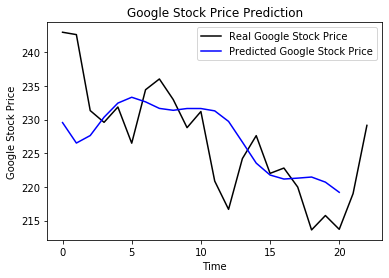

In [42]:
# Visualising the results

plt.plot(real_stock_price, color = 'black', label = 'Real Google Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()

plt.show()

!!!!!!!!Compute the RMSE

In [43]:
#import the libraries
import math
from sklearn.metrics import mean_squared_error

In [44]:
rmse = math.sqrt( mean_squared_error( real_stock_price[0:21,:], predicted_stock_price))
rmse

6.759463084458349